In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
# Here, we load the MNIST dataset brought from https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits
# This dataset represents images of handwritten digits. Each datapoint is 8x8 pixel image of the digit.
# Each column in the dataframe represent the value of a particular pixel in the image. The value of each
# pixel is the lightness of the pixel. So the bigger is the value, the closer the pixel is to the white color.
# There is also a column with the label of the digit (its value).

digits = datasets.load_digits(as_frame=True)
df = digits.frame
df['target'] = [digits.target_names[digit_type] for digit_type in df['target']]
df.head(5)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [3]:
# After loading, we need to clean the dataset. Here, we just want to learn how to distinguish between
# 3 and 8, so we do not need all the other digits. Thus, we exclude them.
clean_df = df[(df['target'] == 3) | (df['target'] == 8)].reset_index(drop=True)
clean_df.head(5)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
1,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
2,0.0,2.0,9.0,15.0,14.0,9.0,3.0,0.0,0.0,4.0,...,0.0,0.0,2.0,12.0,12.0,13.0,11.0,0.0,0.0,3
3,0.0,0.0,10.0,7.0,13.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,14.0,5.0,0.0,0.0,0.0,8
4,0.0,1.0,8.0,12.0,15.0,14.0,4.0,0.0,0.0,3.0,...,0.0,0.0,0.0,14.0,15.0,11.0,2.0,0.0,0.0,3


Showing images for digit 3:


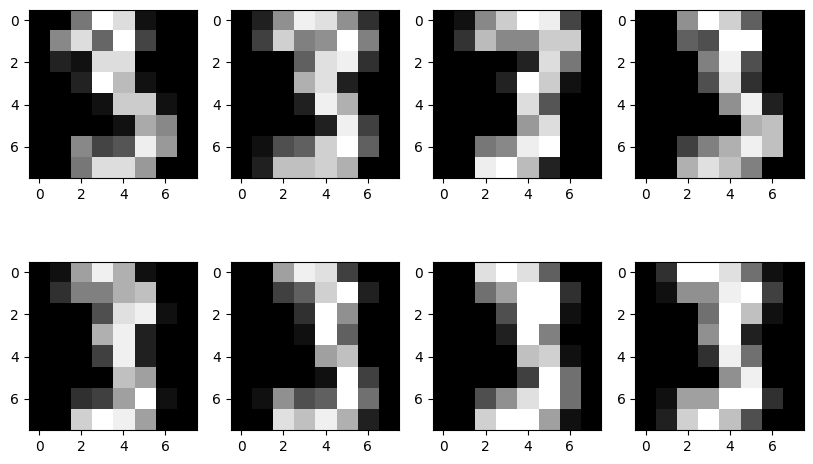



Showing images for digit 8:


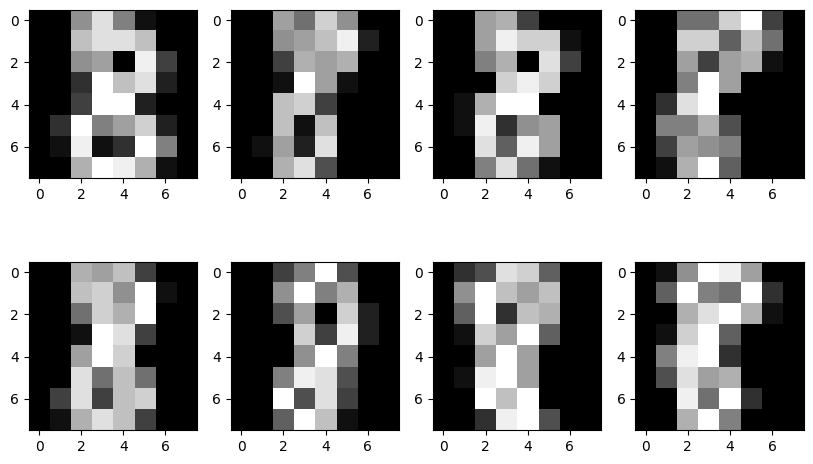

In [4]:
# After loading and cleaning, we can visualize the dataset. To do so, we go through
# 8 first datapoints for each of the unique digit (3 and 8) in our case and plot them as subplots.

for digit in clean_df['target'].unique():
    print(f'Showing images for digit {digit}:')
    data = clean_df[clean_df['target'] == digit].reset_index(drop=True)
    plt.figure(figsize=(10, 6))
    for digit_ind in range(8):
        single_image = data.iloc[digit_ind, :-1].values.reshape(8, 8)
        ax = plt.subplot(2, 4, digit_ind + 1)
        ax.imshow(single_image, cmap = 'gray')
    plt.show()
    print('\n')